# NYC Taxi Trip Duration

### Self Observation
1. cannot ask doubt in community because of members limit.
2. I Know different techniques for EDA and data pre processing
but I fail to use it effectively on data (specially visualizations).
Usually I try different stuff randomly and see if something makes sense.
3. Difficult to choose which variable to use for plotting. 

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

### Reading Data

In [4]:
df = pd.read_csv('./nyc_taxi_trip_duration.csv')

## EDA

In [20]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [19]:
# Data need to be normalised as features are in different scale. so normalise from -1 to 1
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322,729322,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,2016-04-01 11:17:42.123299584,2016-04-01 11:33:34.352432128,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
min,1.000000,2016-01-01 00:01:14,2016-01-01 00:05:54,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,2016-02-17 18:46:36.249999872,2016-02-17 19:00:30.500000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,2016-04-01 17:30:37.500000,2016-04-01 17:46:47.500000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2016-05-15 07:13:01.249999872,2016-05-15 07:38:40.500000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06
std,0.498745,NaN,NaN,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03


In [7]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
# Convert datetime fields from object to python datetime
def convert_to_datetime(X):
    datetime_format = "%Y-%m-%d %H:%M:%S"
    obj = datetime.strptime(X, datetime_format)
    return obj

In [9]:
df['pickup_datetime'] = df['pickup_datetime'].apply(convert_to_datetime)
df['dropoff_datetime'] = df['dropoff_datetime'].apply(convert_to_datetime)

In [10]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [11]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64

In [12]:
df['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

In [13]:
delta_time = df['dropoff_datetime'][0] - df['pickup_datetime'][0]

In [14]:
delta_time.seconds

400

In [15]:
df['trip_duration'][0]

400

<Axes: xlabel='pickup_datetime', ylabel='passenger_count'>

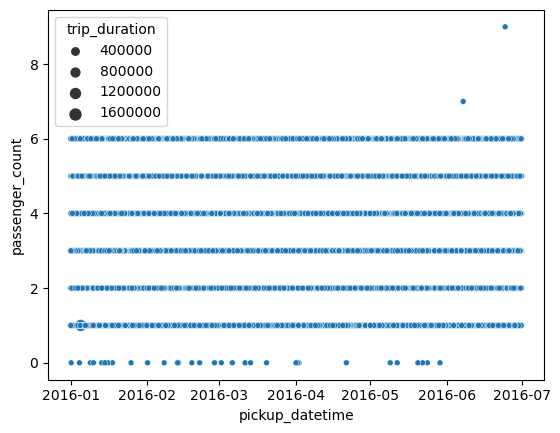

In [16]:
sns.scatterplot(df, x='pickup_datetime', y='passenger_count', size='trip_duration')

In [18]:
# Check for missing data
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Data Pre Processing

In [73]:
# Separate datetime, string, and numerical columns
target = 'trip_duration'
datetime_columns = df.select_dtypes(include=['datetime']).columns
string_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns


In [75]:
numeric_columns = numeric_columns.to_list()
numeric_columns.remove(target)

In [82]:
# Normalise data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [83]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,0.931533,2016-02-29 16:40:21,2016-02-29 16:47:01,-0.504444,0.280911,0.832127,0.137198,0.538014,N,400
1,id0889885,-1.073500,2016-03-11 23:35:37,2016-03-11 23:53:57,0.257493,-0.212156,-0.570815,-0.306500,-1.577382,N,1100
2,id0857912,0.931533,2016-02-21 17:59:33,2016-02-21 18:26:48,0.257493,-0.341220,-0.876953,0.364913,0.642175,N,1635
3,id3744273,0.931533,2016-01-05 09:44:31,2016-01-05 10:03:32,3.305240,0.169785,0.261980,0.239160,0.800639,N,1141
4,id0232939,-1.073500,2016-02-17 06:42:23,2016-02-17 06:56:31,-0.504444,-0.625160,-1.263600,-0.212103,-0.309245,N,848


In [86]:
# Convert String Columns to Numeric

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['store_and_fwd_flag'] = encoder.fit_transform(df['store_and_fwd_flag'])

In [88]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
0    725282
1      4040
Name: count, dtype: int64

## Feature Engineering

In [100]:
# Use Datetime column, split column in 4 categories - Year, Month, day, time 
# Convert datetime to timestamp
df['pickup_datetime_year'] = df['pickup_datetime'].dt.year
df['pickup_datetime_month'] = df['pickup_datetime'].dt.month
df['pickup_datetime_day'] = df['pickup_datetime'].dt.day
df['pickup_datetime_hour'] = df['pickup_datetime'].dt.hour
df['pickup_datetime_minute'] = df['pickup_datetime'].dt.minute
df['pickup_datetime_second'] = df['pickup_datetime'].dt.second
df['pickup_datetime'] = df['pickup_datetime'].astype(int) / 10**9


In [102]:
df['dropoff_datetime_year'] = df['dropoff_datetime'].dt.year
df['dropoff_datetime_month'] = df['dropoff_datetime'].dt.month
df['dropoff_datetime_day'] = df['dropoff_datetime'].dt.day
df['dropoff_datetime_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_datetime_minute'] = df['dropoff_datetime'].dt.minute
df['dropoff_datetime_second'] = df['dropoff_datetime'].dt.second
df['dropoff_datetime'] = df['dropoff_datetime'].astype(int) / 10**9

In [103]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,dropoff_datetime_year,dropoff_datetime_month,dropoff_datetime_day,dropoff_datetime_hour,dropoff_datetime_minute,dropoff_datetime_second
0,id1080784,0.931533,1.456764e+09,1.456764e+09,-0.504444,0.280911,0.832127,0.137198,0.538014,0,...,29,16,40,21,2016,2,29,16,47,1
1,id0889885,-1.073500,1.457739e+09,1.457740e+09,0.257493,-0.212156,-0.570815,-0.306500,-1.577382,0,...,11,23,35,37,2016,3,11,23,53,57
2,id0857912,0.931533,1.456078e+09,1.456079e+09,0.257493,-0.341220,-0.876953,0.364913,0.642175,0,...,21,17,59,33,2016,2,21,18,26,48
3,id3744273,0.931533,1.451987e+09,1.451988e+09,3.305240,0.169785,0.261980,0.239160,0.800639,0,...,5,9,44,31,2016,1,5,10,3,32
4,id0232939,-1.073500,1.455691e+09,1.455692e+09,-0.504444,-0.625160,-1.263600,-0.212103,-0.309245,0,...,17,6,42,23,2016,2,17,6,56,31
